In [1]:
!pip install arch

     |████████████████████████████████| 902 kB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 41.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# ***How to compute volatility***

1. Calculate returns as percentage of price changes

$$returns = \frac{P_{t+1}-P_t}{P_t}$$

```
returns = price_data.pct_change()
```
2.  Calculate the sample standard deviation

$$volatility = \sqrt{\frac{\sum_{i=1}^n\left(returns_i-\dfrac{\sum_{i=1}^nreturns_i}{n}\right)}{n-1}}$$

```
volatility = returns.std()
```

# ***Volatility conversion***

* Convert to *monthly* volatility from *daily*: (assume 21 trading days in a month)

$$\sigma_{monthly} = \sqrt{21}\times\sigma_{daily}$$

* Convert to *annual* volatility from *daily*: (assume 252 trading days in a year)

$$\sigma_{annual} = \sqrt{252}\times\sigma_{daily}$$

### ***Observe volatility clustering***

Volatility clustering is frequently observed in financial market data, and it poses a challenge for time series modeling.

You will get familiar with the S&P 500 daily price dataset. You will calculate daily returns as the percentage price changes, plot the results, and observe its behavior over time.

Historical S&P 500 daily price data has been preloaded in `sp_price` for you.

* Calculate daily returns as percentage price changes and save it to the DataFrame `sp_price` in a new column called `Return`.
* View the data by printing out the last 10 rows.
* Plot the Return column and observe signs of volatility clustering.

              Close    Return
Date                         
2019-09-27  2961.79 -0.531633
2019-09-30  2976.74  0.504762
2019-10-01  2940.25 -1.225838
2019-10-02  2887.61 -1.790324
2019-10-03  2910.63  0.797199
2019-10-04  2952.01  1.421685
2019-10-07  2938.79 -0.447830
2019-10-08  2893.06 -1.556083
2019-10-09  2919.40  0.910455
2019-10-10  2938.13  0.641570


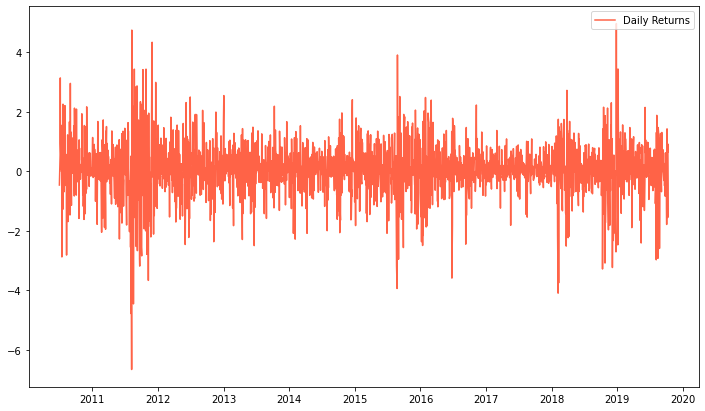

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

sp_price = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')[['Close']]

# Calculate daily returns as percentage price changes
sp_price['Return'] = 100 * (sp_price['Close'].pct_change())

# View the data
print(sp_price.tail(10))

# plot the data
plt.figure(figsize=(12,7))
plt.plot(sp_price['Return'], color='tomato', label='Daily Returns')
plt.legend(loc='upper right')
plt.show()

As shown in the plot, the market exhibited periods of high volatility followed by periods of low volatility. Let's see how GARCH models tackle the challenge posed by volatility clustering.

### ***Calculate volatility***

In this exercise, you will practice how to compute and convert volatility of price returns in Python.

Firstly, you will compute the daily volatility as the standard deviation of price returns. Then convert the daily volatility to monthly and annual volatility.

S&P 500 time series has been preloaded in `sp_data`, and the percentage price return is stored in the `’Return’` column.

* Plot the `'Return'` column in `sp_data`.
* Calculate the standard deviation of `'Return'` data.
* Calculate monthly volatility from daily volatility.
* Calculate annual volatility from daily volatility.

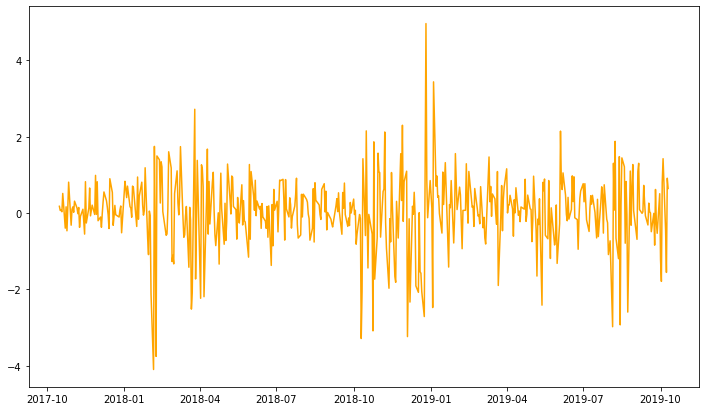

Daily volatility:  0.94%
Monthly volatility:  4.31%
Annual volatility:  14.92%


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt


sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date').loc['2017-10-16':]

# Plot the price returns
plt.figure(figsize=(12,7))
plt.plot(sp_data['Return'], color='orange')
plt.show()

# Calculate daily std of returns
std_daily = sp_data['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Notice the market is indeed risky. Annualized S&P 500 volatility indicates actual S&P 500 returns can fluctuate over 10% around the mean return.

# ***Model notations***

* Conditional expected return:
$$\mu_t = E_{t-1}[r_t]$$

* Predicted return:
$$r_t = \mu_t + \epsilon_t$$

* Conditional variance (Volatility):
$$\sigma^2 = E_{t-1}[(r_t-\mu_t)^2]$$

* * Residual:
$$\epsilon_t = r_t - \mu_t$$

If the prediction works well, the residual should equal

$$\epsilon_t = \sigma_t \times \zeta(White \ Noise)$$

# ***ARCH***

* ARCH(1) 
$$\sigma_t^2 = \omega + \alpha\epsilon_{t-1}^2$$

* ARCH(p)
$$\sigma_t^2 = \omega + \sum_{j=1}^p\alpha_j\epsilon_{t-j}^2$$

# ***GARCH***
### ***GARCH estimates the volatility at time $t$ based on information known as of time $t-1$ as a weighted average of past information.*** 

**Examples**:
* GARCH(1,1)
$$\sigma_t^2 = \omega + \alpha\epsilon_{t-1}^2 + \beta\sigma_{t-1}^2$$

* GARCH(p, q)
$$\sigma_t^2 = \omega + \sum_{i=1}^p\alpha_i\epsilon_{t-i}^2 + \sum_{j=1}^q\beta_j\sigma_{t-j}^2$$

**Assumptions for GARCH(1,1)**: 
* Nonegative variance
  $$\omega, \alpha, \beta > 0$$

* Mean-reverting to the long-run variance
  $$\alpha + \beta < 1$$

* Long-run variance
  $$\frac{\omega}{1-\alpha - \beta}$$

### ***Simulate ARCH and GARCH series***

Simulate an ARCH(1) and GARCH(1,1) time series respectively using a predefined function `simulate_GARCH(n, omega, alpha, beta=0)`.

Recall the difference between an ARCH(1) and a GARCH(1,1) model is: besides an autoregressive component of $\alpha$ multiplying lag-1 residual squared, a GARCH model includes a moving average component of $\beta$ multiplying lag-1 variance.

The predefined function will simulate an ARCH/GARCH series based on `n` (number of simulations), `omega`, `alpha`, and `beta` (`0` by default) you specify. It will return simulated residuals and variances. Afterwards you will plot and observe the simulated variances from the ARCH and GARCH process.

* Simulate an ARCH(1) process with `omega=0.1`, `alpha=0.7`.
* Simulate a GARCH(1,1) process with `omega=0.1`, `alpha=0.7`, and `beta=0.1`.
* Plot the simulated ARCH variances and GARCH variances respectively.


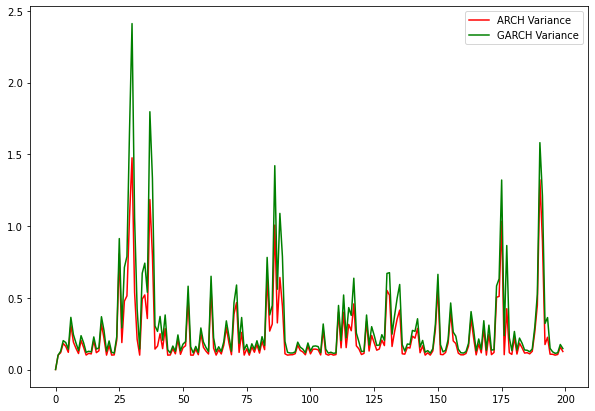

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_GARCH(n, omega, alpha, beta=0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size=n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance

##############################################################################

# Simulate a ARCH(1) series
arch_resid, arch_var = simulate_GARCH(n=200, omega=0.1, alpha=0.7)

# Simulate a GARCH(1,1) series
garch_resid, garch_var = simulate_GARCH(n=200, omega=0.1, alpha=0.7, beta=0.1)

# Plot the ARCH variance
plt.figure(figsize=(10, 7))
plt.plot(arch_var, color='red', label='ARCH Variance')

# Plot the GARCH variance
plt.plot(garch_var, color='green', label='GARCH Variance')
plt.legend()
plt.show()

As you can see, overall GARCH model generated higher volatility estimates due to the additional moving average component.

### ***Observe the impact of model parameters***

Call the predefined function `simulate_GARCH()` again, and study the impact of GARCH model parameters on simulated results.

Specifically, you will simulate two GARCH(1,1) time series, they have the same `omega` and `alpha`, but different `beta` as input.

Recall in GARCH(1,1), since $\beta$ is the coefficient of lag-1 variance, if the $\alpha$ is fixed, the larger the $\beta$, the longer the duration of the impact. In other words, high or low volatility periods tend to persist. Pay attention to the plotted results and see whether you can verify the $\beta$ impact.


* Generate a GARCH(1,1) process with `200` simulations, `omega=0.1`, `alpha=0.3`, and `beta=0.2` as input.

* Generate a GARCH(1,1) process with `200` simulations, `omega=0.1`, `alpha=0.3`, and `beta=0.6` as input.

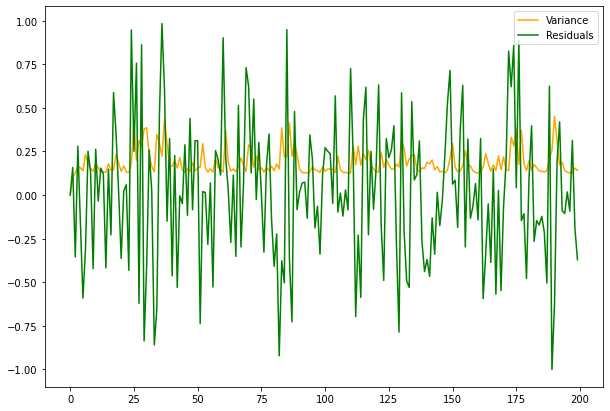

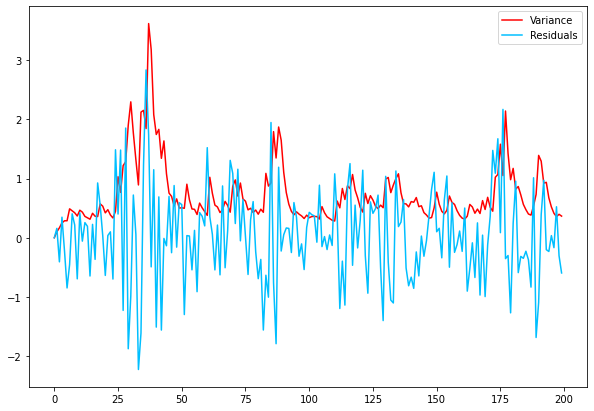

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_GARCH(n, omega, alpha, beta=0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size=n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance

##############################################################################

# First simulated GARCH
sim_res, sim_var = simulate_GARCH(n=200,  omega=0.1, alpha=0.3, beta=0.2)
plt.figure(figsize=(10,7))
plt.plot(sim_var, color='orange', label = 'Variance')
plt.plot(sim_res, color='green', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

# Second simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n=200, omega=0.1, alpha=0.3, beta=0.6)
plt.figure(figsize=(10,7))
plt.plot(sim_variance, color='red', label='Variance')
plt.plot(sim_resid, color='deepskyblue', label='Residuals')
plt.legend(loc='upper right')
plt.show()

Notice the second simulated GARCH time series with higher $\beta$ has bigger variances in general. The shock that occurred earlier had persistent impact on later data points.

# ***Python "`arch`" package***

In [ ]:
from arch import arch_model

## **Work Flow**

1. Specify the model
2. Fit the model
3. Make a forecast

### ***Assumptions***

* Mean model: `"constant"` (default), `"zero"` , `"AR"`
* Volatility model: `"GARCH"` (default), `"ARCH"` , `"EGARCH"`
* Distribution: `"normal"` (default), `"t"` , `"skewt"`

Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.0058854960666
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.988661726899
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.963828246917
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
mu          0.077239
omega       0.039587
alpha[1]    0.167963
beta[1]     0.786467
Name: params, dtype: float64
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                     

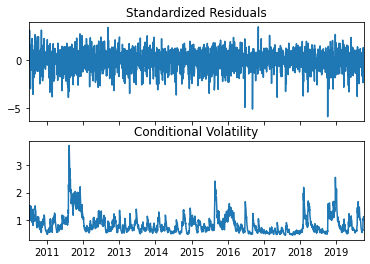

In [ ]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# GARCH(1,1)
gm_model = arch_model(sp_data['Return'], p=1, q=1, mean ='constant', vol='GARCH', dist='normal')
gm_result = gm_model.fit(update_freq=4)

print(gm_result.params)
print(gm_result.summary())
gm_result.plot()
plt.show()

The fitting process estimates parameter values for which GARCH model is most likely to be able to generate the observed time series.

## ***Forecasting***



In [ ]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon=5, reindex=True)

# Print out the last row of variance forecast
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-10  0.994079  0.988366  0.982913  0.977708  0.972741


* h.1 in row "2019-10-10": 1-step ahead forecast
* h.5 in row "2019-10-10": 5-step ahead forecast

### ***Implement a basic GARCH model*** (*This is similar to the slides.*)

Use **`arch_model()`** to implement a GARCH(1,1).

First define a basic GARCH(1,1) model, then fit the model, review the model fitting summary, and plot the results.

The data to use S&P 500 price return data has been preloaded as `sp_data`. Also the arch package has been imported for you.

* Define a GARCH(1,1) model `basic_gm` with `'constant'` mean and `'normal'` distribution of the residuals.
* Fit the model `basic_gm`.
* Print a summary of the fitted GARCH model.
* Plot the model estimated result.

Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.0058854960666
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.988661726899
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.963828246917
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.0058854960666
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.988661726899
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.963828246917
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                 

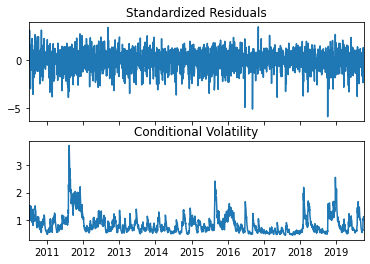

In [ ]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

##############################################################################

# Specify GARCH model assumptions
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')

# Fit the model
gm_result = basic_gm.fit(update_freq=4)

# Display model fitting summary
print(gm_result.summary())

# Plot fitted results
gm_result.plot()
plt.show()

### ***Make forecast with GARCH models***

Previously you have implemented a basic GARCH(1,1) model with the Python **`arch`** package. In this exercise, you will practice making a basic volatility forecast.

You will again use the historical returns of S&P 500 time series. First define and fit a GARCH(1,1) model with all available observations, then call **`.forecast()`** to make a prediction. By default it produces a 1-step ahead estimate. You can use `horizon=n` to specify longer forward periods.

* Define a basic GARCH(1,1) model `basic_gm`.
* Fit the model.
* Use the fitted model `gm_result` to make `5`-period ahead variance forecast.
* Print out the variance forecast result.

In [4]:
import pandas as pd
from arch import arch_model

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

##############################################################################

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
# Fit the model
gm_result = basic_gm.fit(disp='off')

# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon=5, reindex=True)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-10  0.994079  0.988366  0.982913  0.977708  0.972741


In [8]:
# Print the forecast mean
gm_forecast.mean[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-10,0.077239,0.077239,0.077239,0.077239,0.077239


Notice in the output, the value in h.1 is a 1-step ahead forecast, while values in h.2, …, h.5 are 2, …, 5-step ahead forecasts. 

# ***Standardized residuals***

Residuals = predicted return - mean return
$$\epsilon_t = r_t - \mu_t$$

Standardized residual = residual / return volatility
$$Std \ Residuals = \frac{\epsilon_t}{\sigma_t}$$

# ***Residuals in GARCH***



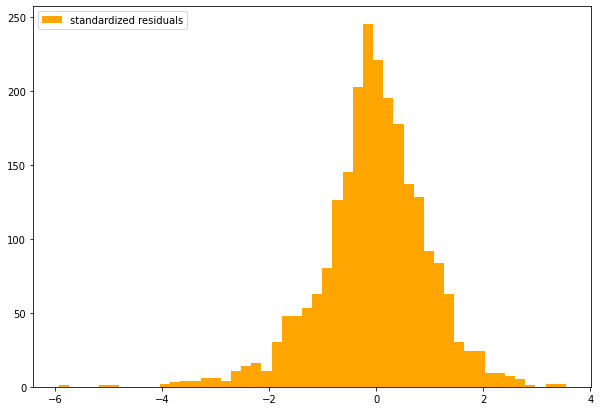

In [2]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')

# Fit the model
gm_result = basic_gm.fit(disp='off')

gm_std_resid = gm_result.resid / gm_result.conditional_volatility
plt.hist(gm_std_resid, facecolor='orange', label='standardized residuals', bins=50)
plt.legend(loc='upper left')
plt.show()

In [3]:
gm_result.conditional_volatility

Date
2010-07-01    1.234365
2010-07-02    1.124695
2010-07-06    1.041168
2010-07-07    0.963055
2010-07-08    1.528885
                ...   
2019-10-04    1.004238
2019-10-07    1.065989
2019-10-08    0.989738
2019-10-09    1.121641
2019-10-10    1.070342
Name: cond_vol, Length: 2336, dtype: float64

# ***Skewness***

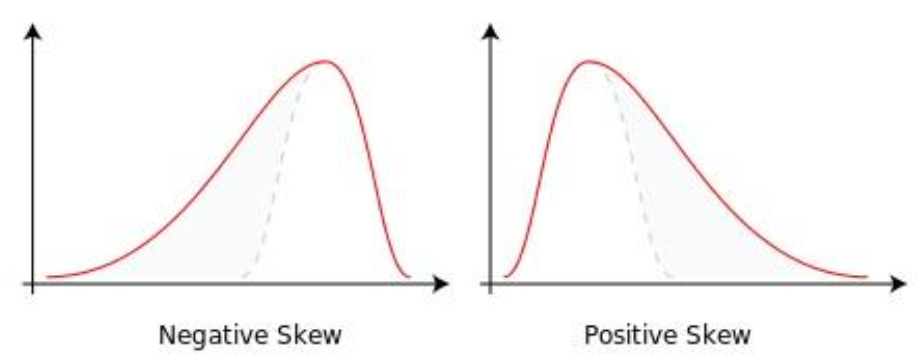

# ***GARCH with t-distribution***

In [ ]:
result = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='t').fit(disp='off')
print(result.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2694.52
Distribution:      Standardized Student's t   AIC:                           5399.05
Method:                  Maximum Likelihood   BIC:                           5427.83
                                              No. Observations:                 2336
Date:                      Wed, Feb 02 2022   Df Residuals:                     2335
Time:                              16:53:32   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

# ***GARCH with skewed t-distribution***


In [ ]:
result = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='skewt').fit(disp='off')
print(result.summary())

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                            Return   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2689.98
Distribution:      Standardized Skew Student's t   AIC:                           5391.96
Method:                       Maximum Likelihood   BIC:                           5426.50
                                                   No. Observations:                 2336
Date:                           Wed, Feb 02 2022   Df Residuals:                     2335
Time:                                   16:56:06   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

* $\lambda < 0 \Longrightarrow $ Negatively skewed
* $\lambda > 0 \Longrightarrow $ Positively skewed

### ***Plot distribution of standardized residuals***

GARCH models make distribution assumptions of the standardized residuals. Recall residuals are the differences between predicted returns and the mean returns. And standardized residuals are the residuals divided by the model estimated volatility.

In this exercise, you will practice computing the standardized residuals from a fitted GARCH model, and then plot its histogram together with a standard normal distribution `normal_resid`.

A GARCH model has been defined and fitted with S&P 500 price return data. The fitted result can be accessed as `gm_result`. In addition matplotlib has been preloaded as `plt`.

* Obtain model estimated residuals and save it in `gm_resid`.
* Obtain model estimated volatility and save it in `gm_std`.
* Calculate the standardized residuals `gm_std_resid`.
* Plot a histogram of `gm_std_resid`.

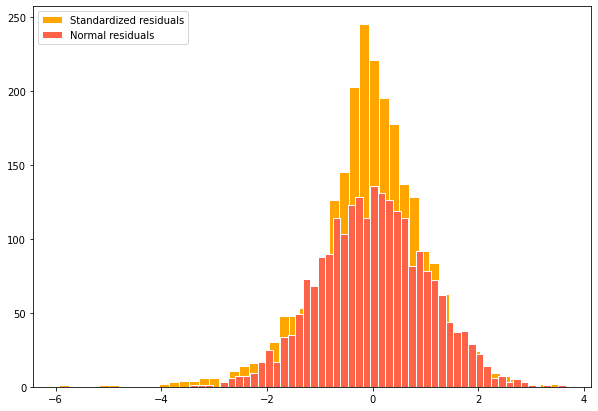

In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')
normal_resid = np.random.normal(size=len(gm_resid))

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')

# Fit the model
gm_result = basic_gm.fit(disp='off')

#############################################################################

# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins=50, 
         facecolor='orange', label='Standardized residuals', edgecolor='white')
plt.hist(normal_resid, bins=50, 
         facecolor='tomato', label='Normal residuals', edgecolor='white')
plt.legend(loc = 'upper left')
plt.show()

Notice that compared with a standard normal distribution, the distribution curve of standardized residuals from the GARCH models exhibits more peaks, asymmetry, and has a negative skew.

### ***Fit a GARCH with skewed t-distribution***

The default normal distribution assumption of the standardized residuals used in GARCH models are not representative of the real financial world. Fat tails and skewness are frequently observed in financial return data.

In this exercise, you will improve the GARCH model by using a skewed Student's t-distribution assumption. In addition, you will compare the model estimated volatility with that from a model with a normal distribution assumption by plotting them together.

A GARCH model with the default normal distribution assumption has been fitted for you, and its volatility estimation is saved in `normal_vol`.

* Define a GARCH model `skewt_gm` with a skewed Student's t-distribution assumption.
* Fit the model and save the result in `skewt_result`.
* Save the model estimated conditional volatility in `skewt_vol`.
* Plot `skewt_vol` together with the normal GARCH estimations and the actual return data.

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2706.3502661449193
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2703.875759835297
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2702.073771852049
Iteration:      4,   Func. Count:     39,   Neg. LLF: 2693.054376205472
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2692.9462045394107
Iteration:      6,   Func. Count:     60,   Neg. LLF: 2692.548790708311
Iteration:      7,   Func. Count:     69,   Neg. LLF: 2691.171644654134
Iteration:      8,   Func. Count:     78,   Neg. LLF: 2690.5515722560303
Iteration:      9,   Func. Count:     86,   Neg. LLF: 2690.3468397389443
Iteration:     10,   Func. Count:     95,   Neg. LLF: 2690.167956137383
Iteration:     11,   Func. Count:    104,   Neg. LLF: 2689.9945039526638
Iteration:     12,   Func. Count:    112,   Neg. LLF: 2689.9909117865086
Iteration:     13,   Func. Count:    120,   Neg. LLF: 2689.981275560587
Iteration:     14,   Func. Count:    128,   Neg. LLF: 2689

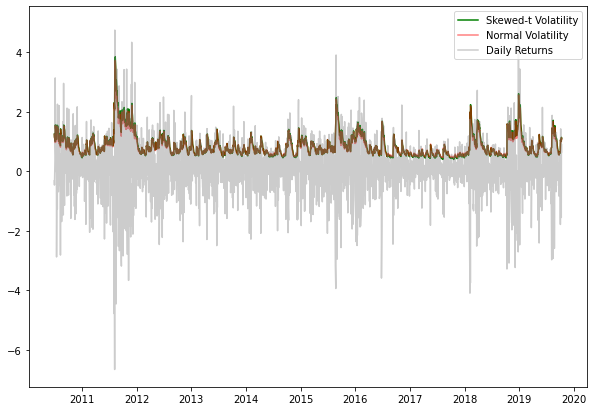

In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')
normal_resid = np.random.normal(size=len(gm_resid))

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')

# Fit the model
gm_result = basic_gm.fit(disp='off')
normal_vol = gm_result.conditional_volatility
#############################################################################

# Specify GARCH model assumptions
skewt_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='skewt')
# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color='green', label='Skewed-t Volatility')
plt.plot(normal_vol, color='red', label='Normal Volatility', alpha=0.5)
plt.plot(sp_data['Return'], color = 'grey', label = 'Daily Returns', alpha=0.4)
plt.legend(loc = 'upper right')
plt.show()

As you can see with skewed Student’s t-distribution assumption, GARCH model estimation is more in line with the actual observations.

# ***Autoregressive mean***


```
arch_model(my_data, p=1, q=1, mean='AR', lags=1, vol='GARCH')
```
### ***Effect of mean model on volatility predictions***

In practice, returns and volatility are modeled in separate processes. Typically the mean assumptions influence predicted returns, but have a minor effect on the volatility estimations.

Examine the impact of GARCH model mean assumptions on volatility estimations by comparing two GARCH models. They have been defined with different mean assumptions and fitted with S&P 500 data.

The model with "constant mean" assumption has results saved in `cmean_result`, and estimated volatility saved in `cmean_vol`. The model with "AR(1)" or 1-lag autoregressive mean assumption has results saved in `armean_result`, and estimated volatility saved in `armean_vol`. The `matplotlib.pyplot` and numpy modules have been imported as `plt` and `np` respectively.

* Print out and review model fitting summaries of `cmean_result` and `armean_result`.
* Plot the volatility estimation `cmean_vol` and `armean_vol` from both models.
* Use **`.corrcoef()`** function from numpy package to calculate the correlation coefficient.


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2788.140503257302
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2786.4431315144047
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2785.5317337799734
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.0058854960666
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2774.2663416741643
Iteration:      6,   Func. Count:     48,   Neg. LLF: 2772.9965295553075
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2772.2418069175924
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.988661726899
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2771.965547669718
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2771.9642780420418
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2771.963838337895
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.963828246917
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.963828246164
            Iteratio

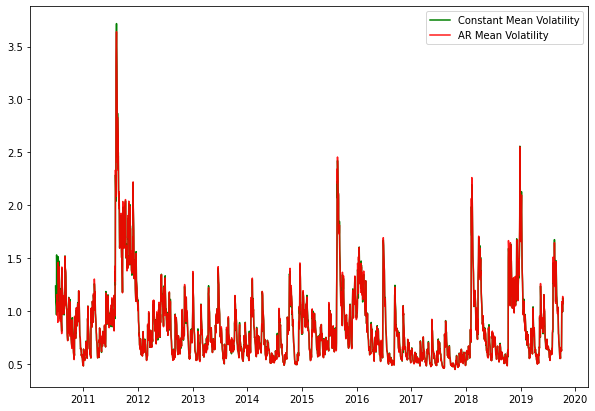

nan


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
cmean_result = basic_gm.fit()
cmean_vol = cmean_result.conditional_volatility

# Note that to implement mean='AR' you need to define number of lags
ar_gm = arch_model(sp_data['Return'], p=1, q=1, mean='AR', vol='GARCH', dist='normal', lags=1)
armean_result = ar_gm.fit()
armean_vol = armean_result.conditional_volatility

###############################################################################

# Print model summary of GARCH with constant mean
print(cmean_result.summary())
# Print model summary of GARCH with AR mean
print(armean_result.summary())

# Plot model volatility 
plt.plot(cmean_vol, color='green', label='Constant Mean Volatility')
plt.plot(armean_vol, color='red', label='AR Mean Volatility', alpha=0.9)
plt.legend(loc = 'upper right')
plt.show()

# Check correlation of volatility estimations
print(np.corrcoef(cmean_vol, armean_vol)[0,1])

The plot shows volatility estimation from both models are very close. In fact, the impact of the mean model assumptions on volatility estimation is so small that, if the interest is only in the volatility dynamics, <ins>***usually one can just assume the most simple specification, namely the constant mean model***</ins>.

# ***GJR-GARCH***

$$\sigma_t^2 = \omega + (\alpha + \gamma I_{t-1})\epsilon_{t-1}^2 + \beta\sigma^2_{t-1}$$

$$I_{t-1} := \left\{\begin{array}{cc}0 & \text{ if } r_{t-1}\geq\mu\\ 1 & \text{ if } r_{t-1} < \mu \end{array}\right.$$

### ***Fit GARCH models to cryptocurrency***

Financial markets tend to react to positive and negative news shocks very differently, and one example is the dramatic swings observed in the cryptocurrency market in recent years.

Implement a GJR-GARCH and an EGARCH model respectively in Python, which are popular choices to model the asymmetric responses of volatility. You will work with a cryptocurrency dataset `bitcoin_data`, which contains two columns: "Close" price and "Return".

The `bitcoin_data` dataset has been preloaded for you, and the historical prices in the column `"Close"` have been plotted.

* Define a GJR-GARCH model as `gjr_gm`.
* Print and review the model fitting summary of `gjrgm_result`.
* Define an EGARCH model as `egarch_gm`.
* Print and review the model fitting summary of `egarch_result`.

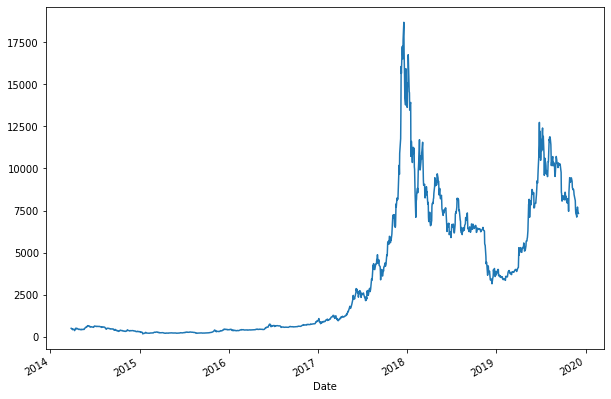

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3966.26
Distribution:      Standardized Student's t   AIC:                           7944.52
Method:                  Maximum Likelihood   BIC:                           7976.33
                                              No. Observations:                 1483
Date:                      Wed, Feb 02 2022   Df Residuals:                     1482
Time:                              21:21:08   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')
bitcoin_data['Close'].plot(figsize=(10, 7))
plt.show()

###########################################################################

# Specify model assumptions
gjr_gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='GARCH', dist='t')

# Fit the model
gjrgm_result = gjr_gm.fit(disp='off')

# Print model fitting summary
print(gjrgm_result.summary())

# Specify model assumptions
egarch_gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='EGARCH', dist='t')

# Fit the model
egarch_result = egarch_gm.fit(disp='off')

# Print model fitting summary
print(egarch_result.summary())

### ***Compare GJR-GARCH with EGARCH***

Previously you have fitted a GJR-GARCH and EGARCH model with Bitcoin return time series. In this exercise, you will compare the estimated conditional volatility from the two models by plotting their results.

The GJR-GARCH model estimated volatility is saved in `gjrgm_vol`, and EGARCH model estimated volatility is saved in `egarch_vol`. You will plot them together with actual Bitcoin return observations, which can be accessed by column `”Return”` in `bitcoin_data`.

* Plot the actual Bitcoin returns.
* Plot GJR-GARCH estimated volatility.
* Plot EGARCH estimated volatility.

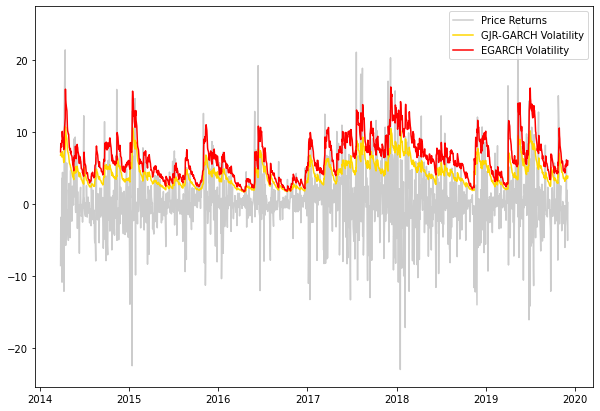

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
plt.figure(figsize=(10, 7))

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')

# Specify model assumptions
gjr_gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='GARCH', dist='t')
egarch_gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='EGARCH', dist='t')

# Fit the model
gjrgm_result = gjr_gm.fit(disp='off')
egarch_result = egarch_gm.fit(disp='off')

gjrgm_vol = gjrgm_result.conditional_volatility
egarch_vol = egarch_result.conditional_volatility

###########################################################################

# Plot the actual Bitcoin returns
plt.plot(bitcoin_data['Return'], color='grey', alpha=0.4, label='Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color='gold', label='GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color='red', label='EGARCH Volatility')

plt.legend(loc='upper right')
plt.show()

Overall both GJR-GARCH and EGARCH models did a good job of fitting the actual data. Comparatively, GJR-GARCH is more conservative in volatility estimation when applying it to the Bitcoin dataset.

# ***Expanding window forecast***

Continuously add new data points to the sample


In [ ]:
for i in range(120):
    gm_result = basic_gm.fit(first_obs=start_loc,last_obs=i + end_loc, disp='off')
    temp_result = gm_result.forecast(horizon=1).variance

# ***Fixed rolling window forecast***

New data points are added while old ones are dropped from the sample


In [ ]:
for i in range(120):
    gm_result = basic_gm.fit(first_obs=i + start_loc, last_obs=i + end_loc, disp='off')
    temp_result = gm_result.forecast(horizon=1).variance

# ***Optimal window size: trade-off to balance bias and variance***

* Too wide window size: include obsolete data that may lead to <ins>***high bias***</ins>
* Too narrow window size: exclude relevant data that may lead to <ins>***higher variance***</ins>

For time series analysis, it is ***NOT*** the case that the bigger the sample size, the better the model performance. One valid question we should always ask is: is this data relevant? Or do the same economic or market conditions still apply?

### ***Fixed rolling window forecast***

Rolling-window forecasts are very popular for financial time series modeling. Implement GARCH model forecasts with a fixed rolling window.

First define the window size inside **`.fit()`**, and perform the forecast with a **`for`**-loop. Note since the window size remains fixed, both the start and end points increment after each iteration.

The S&P 500 return series has been preloaded as `sp_data`, and a GARCH(1,1) model has been predefined in `basic_gm`. The start and end points of the initial sample window has been pre-defined in `start_loc` and `end_loc` respectively.

* Define the fixed rolling window size by specifying `first_obs=` and `last_obs =` in the **`.fit()`** function.
* Perform GARCH forecast and save the result of each iteration.
* Plot the variance forecast results.

This is what temp_result looks like



/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


,h.1
Date,
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
2010-07-07,NaN
2010-07-08,NaN
...,...
2019-10-04,1.042768
2019-10-07,0.951918
2019-10-08,1.167482



This is what temp_result.iloc[end_loc] looks like



h.1    0.719227
Name: 2019-04-01 00:00:00, dtype: float64


This is what fcast.name looks like



Timestamp('2019-04-01 00:00:00')

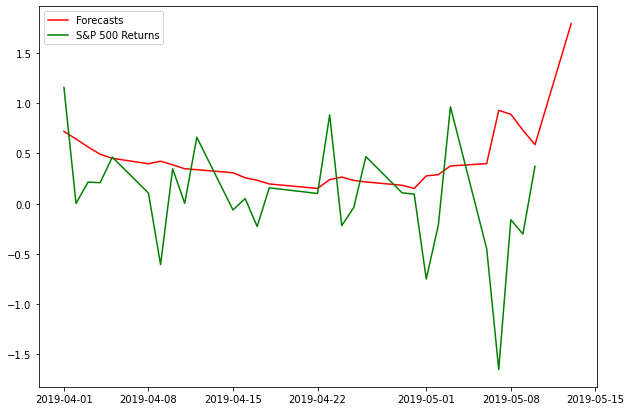

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
plt.figure(figsize=(10, 7))

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
start_loc, end_loc, forecasts = 2081, 2201, {}

gm_result =  basic_gm.fit(first_obs = start_loc, 
                             last_obs = end_loc, disp='off')
temp_result = gm_result.forecast(horizon = 1).variance

print("This is what temp_result looks like\n")
display(temp_result)

print("\nThis is what temp_result.iloc[end_loc] looks like\n")
fcast = temp_result.iloc[end_loc]
display(fcast)

print("\nThis is what fcast.name looks like\n")
display(fcast.name)
forecasts[fcast.name] = fcast

################################################################################

for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs=i + start_loc, last_obs=i + end_loc, disp='off')

    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon=1, reindex=True).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast

# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T

# Plot the forecast variance
plt.plot(forecast_var, color='red', label='Forecasts')
plt.plot(sp_data.Return['2019-4-1':'2019-5-10'], color='green', label='S&P 500 Returns')
plt.legend()
plt.show()

Variance predicted by the model fluctuates with the actual returns.

### ***Compare forecast results***

Different rolling window approaches can generate different forecast results. In this exercise, let's take a closer look by comparing these forecast results.

First, you will use a GARCH model to predict Bitcoin return volatility with an expanding window and a fixed rolling window approach respectively. Then you will plot both forecast results together to visualize the difference.

The Bitcoin dataset is preloaded in `bitcoin_data`, and feel free to explore its columns `'Close'` and `'Return'`. Variance forecast generated with an expanding window approach is saved in `variance_expandwin`, and that with a fixed rolling window approach is saved in `variance_fixedwin`.

* Print out the first 5 rows of variance forecast stored in `variance_expandwin` and `variance_fixedwin` respectively.

* Calculate volatility from variance forecast with an expanding window and a fixed rolling window approach respectively. Use a pre-defined function from numpy (imported as `np`).

Date
2019-03-29      4.112224
2019-04-01      4.246196
2019-04-02     35.267429
2019-04-03     71.524135
2019-04-04    149.239731
dtype: float64
Date
2019-03-29      4.112224
2019-04-01      4.372185
2019-04-02     29.269558
2019-04-03     70.399397
2019-04-04    125.230378
dtype: float64


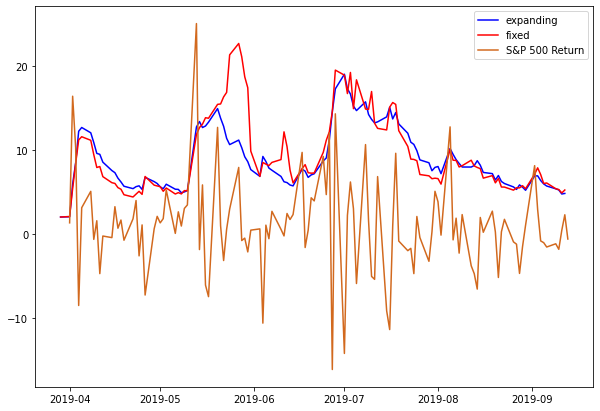

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
plt.figure(figsize=(10, 7))

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')

# Specify model assumptions
gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='EGARCH', dist='t')
start_loc, end_loc, forecasts = 1050, 1305, {} # เลือกให้เหมาะกับขนาดข้อมูล

for i in range(120):
    # Specify fixed rolling window size for model fitting
    gm_result = gm.fit(first_obs =i + start_loc, last_obs=i + end_loc, disp='off')

    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon=1, reindex=True).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast

# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T
forecast_var.index.name = 'Date'
variance_fixedwin = pd.Series(np.ravel(forecast_var.values), index=forecast_var.index)

start_loc, end_loc, forecasts = 1050, 1305, {}

for i in range(120):
    # Specify fixed rolling window size for model fitting
    gm_result = gm.fit(first_obs = start_loc, last_obs=i + end_loc, disp='off')

    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon=1, reindex=True).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast

# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T
forecast_var.index.name = 'Date'
variance_expandwin = pd.Series(np.ravel(forecast_var.values), index=forecast_var.index)

################################################################################

# Print header of variance forecasts with expanding and fixed window
print(variance_expandwin.head())
print(variance_fixedwin.head())

# Calculate volatility from variance forecast with an expanding window
vol_expandwin = np.sqrt(variance_expandwin)
# Calculate volatility from variance forecast with a fixed rolling window
vol_fixedwin = np.sqrt(variance_fixedwin)

# Plot volatility forecast with an expanding window
plt.plot(vol_expandwin, color = 'blue', label='expanding')
# Plot volatility forecast with a fixed rolling window
plt.plot(vol_fixedwin, color = 'red', label='fixed')
plt.plot(bitcoin_data.Return['2019-4-1':'2019-9-15'], color = 'chocolate', label='S&P 500 Return')
plt.legend()
plt.show()

Volatility forecast with a fixed rolling window approach is more responsive to recent return shocks than forecast with an expanding window approach.

### ***Simplify the model with p-values***

Use the p-values to decide the necessity of model parameters, and define a parsimonious model without insignificant parameters.

The null hypothesis is the parameter value is zero. If the p-value is larger than a given confidence level, the null hypothesis cannot be rejected, meaning the parameter is not statistically significant, hence not necessary.

A GARCH model has been defined and fitted by the Bitcoin return data. The model result is saved in `gm_result`.

* Print the model fitting summary.
* Get the model parameters and p-values, and save them in a DataFrame `para_summary`.
* Print and review `para_summary`.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
pd.options.display.float_format = '{:,.2f}'.format

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')


gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='EGARCH', dist='t')
gm_result = gm.fit(disp='off')

##############################################################################

# Print model fitting summary
print(gm_result.summary())

# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'p-value': gm_result.pvalues})

# Print out parameter stats
print(para_summary)

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -3954.19
Distribution:      Standardized Student's t   AIC:                           7920.38
Method:                  Maximum Likelihood   BIC:                           7952.19
                                              No. Observations:                 1483
Date:                      Fri, Feb 04 2022   Df Residuals:                     1482
Time:                              12:43:10   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

$\gamma$'s p-value is larger than 0.05, so the null hypothesis claiming the parameter value is zero cannot be rejected. In this case, an asymmetric GARCH model seems to be an overkill.

### ***Simplify the model with t-statistics***

Besides p-values, t-statistics can also help decide the necessity of model parameters. In this exercise, you will practice using t-statistics to assess the significance of model parameters.

<ins>***The t-statistic is computed as the estimated parameter value subtracted by its expected mean (zero in this case), and divided by its standard error.***</ins> The absolute value of the t-statistic is a distance measure, that tells you how many standard errors the estimated parameter is away from 0. As a rule of thumb, <ins>***if the t-statistic is larger than 2, you can reject the null hypothesis***</ins>.

You will work with the same GARCH model as the previous exercise. You can access the model fitting summary in `gm_result`.

* Get the model parameters, standard errors and t-statistic, and save them in the DataFrame `para_summary`.
* Compute t-statistics manually using parameter values and their standard errors, and save the calculation result in `calculated_t`.
* Print and review `calculated_t`.
* Print and review `para_summary`.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
pd.options.display.float_format = '{:,.2f}'.format

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')


gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='EGARCH', dist='t')
gm_result = gm.fit(disp='off')

##############################################################################

# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'std-err': gm_result.std_err, 
                             't-value': gm_result.tvalues})

# Verify t-statistic by manual calculation
calculated_t = para_summary['parameter']/para_summary['std-err']

# Print calculated t-value
print(calculated_t)

# Print parameter stats
print(para_summary)

mu          3.00
omega       2.50
alpha[1]    4.16
gamma[1]    0.55
beta[1]    91.01
nu         16.27
dtype: float64
          parameter  std-err  t-value
mu             0.16     0.05     3.00
omega          0.22     0.09     2.50
alpha[1]       0.44     0.11     4.16
gamma[1]       0.02     0.03     0.55
beta[1]        0.98     0.01    91.01
nu             2.33     0.14    16.27


 The t-statistics are in agreement with p-values, pointing out that the $\gamma$ parameter is not statistically significant and should be left out of the model.

 ### ***ACF plot***
 
If a GARCH model is doing a good job, the standardized residuals should not exhibit autocorrelations. In this exercise, you will practice using an ACF plot to detect autocorrelations in the data.

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF), and an ACF plot is a visual representation of correlations between different lags. There are pre-defined functions in Python **`statsmodels`** packages that enable you to generate ACF plots easily.

A GARCH model has been fitted with the S&P 500 return data, and its standardized residuals have been calculated and saved in `std_resid`. The **`matplotlib.pyplot`** has been imported as **`plt`**.

* Import the module needed for ACF plots from the **`statsmodels`** package.
* Plot the GARCH model standardized residuals saved in `std_resid`.
Generate an ACF plot of the standardized residuals, and set the confidence level to `0.05`.

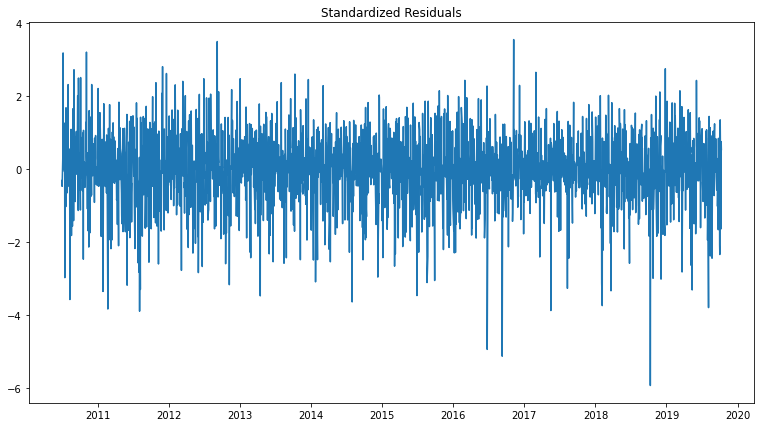

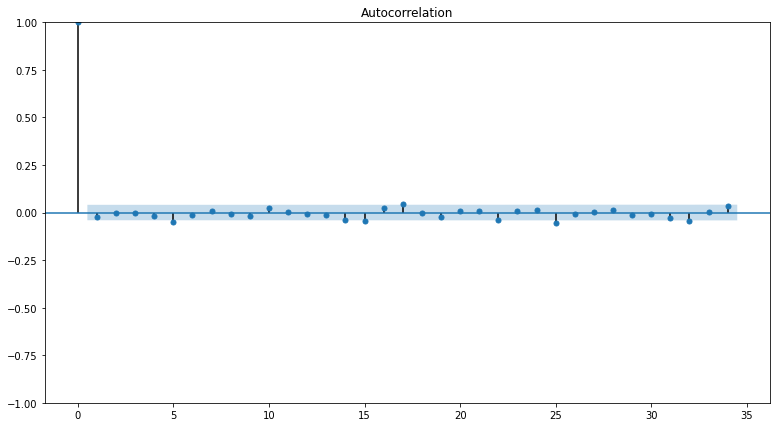

In [6]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')

# Fit the model
gm_result = gm.fit(disp='off')

std_resid = gm_result.resid / gm_result.conditional_volatility
std_resid

##############################################################################

# Import the Python module
from statsmodels.graphics.tsaplots import plot_acf

# Plot the standardized residuals
plt.figure(figsize=(13,7))
plt.plot(std_resid)
plt.title('Standardized Residuals')
plt.show()

# Generate ACF plot of the standardized residuals
fig, ax = plt.subplots(figsize=(13, 7))
plot_acf(std_resid, alpha=0.05, ax=ax)
plt.show()

The ACF plot shows the majority of the data points are within the confidence interval, so the model is doing a decent job.

### ***Ljung-Box test***

Another powerful tool to check autocorrelations in the data is the ***Ljung-Box test***. Detect autocorrelation in the standardized residuals by performing a Ljung-Box test.

The null hypothesis of Ljung-Box test is: the data is independently distributed. If the p-value is larger than the specified significance level, the null hypothesis cannot be rejected. In other words, there is no clear sign of autocorrelations and the model is valid.

You will use the same GARCH model as the previous exercise. Its standardized residuals are saved in `std_resid`.

* Import the module needed for Ljung-Box tests from the `statsmodels` package.
* Perform a Ljung-Box test up to lag `10`, and save the result in `lb_test`.
* Print and review p-values from the Ljung-Box test result.

In [13]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')

# Fit the model
gm_result = gm.fit(disp='off')

std_resid = gm_result.resid / gm_result.conditional_volatility

##############################################################################

# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(std_resid , lags=10)

# Print the p-values
print('P-values are: \n',lb_test['lb_pvalue'])

P-values are: 
 1    0.23
2    0.49
3    0.69
4    0.72
5    0.17
6    0.23
7    0.31
8    0.40
9    0.41
10   0.39
Name: lb_pvalue, dtype: float64


All the p-values are larger than 5% so the null hypothesis cannot be rejected. In other words, no autocorrelations detected and the model is doing a decent job.

### ***Pick a winner based on log-likelihood***

Use log-likelihood to choose a model with the best fit.

GARCH models use the maximum likelihood method to estimate parameters. In general, <ins>***the bigger the log-likelihood, the better the model***</ins> since it implies a bigger probability of having observed the data you got.

Two GARCH models with different distribution assumptions have been defined and fitted with the S&P 500 return data. The normal distribution GARCH is saved in `normal_result`, and the skewed Student's t-distribution GARCH is saved in `skewt_result`.

* Print and review model fitting summaries in `normal_result` and `skewt_result` respectively.
* Print the log-likelihood in `normal_result` and `skewt_result` respectively.

In [14]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
normal_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
skewt_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='skewt')

# Fit the model
normal_result = normal_gm.fit(disp='off')
skewt_result = skewt_gm.fit(disp='off')

##############################################################################

# Print normal GARCH model summary
print(normal_result.summary())
# Print skewed GARCH model summary
print(skewt_result.summary())

# Print the log-likelihodd of normal GARCH
print('Log-likelihood of normal GARCH :', normal_result.loglikelihood)
# Print the log-likelihodd of skewt GARCH
print('Log-likelihood of skewt GARCH :', skewt_result.loglikelihood)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                Fri, Feb 04 2022   Df Residuals:                     2335
Time:                        18:45:08   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-0

The GARCH model with skewed Student's t-distribution assumption has a higher log-likelihood, hence is relatively better.

### ***Pick a winner based on AIC/BIC***
Use information criteria to choose a model with the best fit.

A GJR-GARCH model and EGARCH model have been defined and fitted with the S&P 500 return data. Their results can be accessed in `gjrgm_result` and `egarch_result` respectively.

* Print the AIC in `gjrgm_result` and `egarch_result` respectively.
* Print the BIC in `gjrgm_result` and `egarch_result` respectively.

In [16]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
gjr_gm = arch_model(sp_data['Return'], p=1, q=1, o=1, mean='constant', vol='GARCH', dist='normal')
egarch_gm = arch_model(sp_data['Return'], p=1, q=1, o=1, mean='constant', vol='EGARCH', dist='normal')

# Fit the model
gjr_result = gjr_gm.fit(disp='off')
egarch_result = egarch_gm.fit(disp='off')

##############################################################################

# Print the AIC GJR-GARCH
print('AIC of GJR-GARCH model :', gjr_result.aic)
# Print the AIC of EGARCH
print('AIC of EGARCH model :', egarch_result.aic)

# Print the BIC GJR-GARCH
print('BIC of GJR-GARCH model :', gjr_result.bic)
# Print the BIC of EGARCH
print('BIC of EGARCH model :', egarch_result.bic)

AIC of GJR-GARCH model : 5436.512139164899
AIC of EGARCH model : 5397.702424795749
BIC of GJR-GARCH model : 5465.2931158846395
BIC of EGARCH model : 5426.483401515489


Both AIC and BIC of the EGARCH model are lower, hence EGARCH is relatively better.

### ***Backtesting with MAE, MSE***
### *Don't know how to find actual varinces and forecast variances properly.  Tried forecast methods above but they didn't produce close results. (คิดว่า น่าจะใช้ rolling window ในการคำนวณ)*  


Evaluate model performance by conducting backtesting. The out-of-sample forecast accuracy is assessed by calculating MSE and MAE.

You can easily estimate prediction errors MSE and MAE with pre-defined functions in the **`sklearn.metrics`** package. The actual variance and predicted variance have been preloaded in `actual_var` and `forecast_var` respectively.

* In `evaluate()`, perform the MAE calculation by calling the corresponding function from `sklean.metrics`.
* In `evaluate()`, perform the MSE calculation by calling the corresponding function from `sklean.metrics`.
* Pass variables to `evaluate()` in order to perform the backtest.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
plt.figure(figsize=(10, 7))

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
start_loc, end_loc, forecasts = 2200, 2263, {}

for i in range(60):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs=i + start_loc, last_obs=i + end_loc, disp='off')

    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon=1, reindex=True).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast

# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T

print(forecast_var.head())
print(forecast_var.tail())

############################################################################

def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    return mae, mse

# Backtest model with MAE, MSE
evaluate(actual_var, forecast_var)

                 h.1
2019-06-28  0.422291
2019-07-01  0.435443
2019-07-02  0.401538
2019-07-03  0.420593
2019-07-05  0.404429
                 h.1
2019-09-17  0.247647
2019-09-18  0.198443
2019-09-19  0.149807
2019-09-20  0.222711
2019-09-23  0.189243


<Figure size 720x504 with 0 Axes>

Not sure which ways was used.  More importantly, HOW TO CALCULATE THE ACTUAL VAR?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

sp_data = pd.read_csv('SP500.csv', parse_dates=True, index_col='Date')

# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
gm_result = basic_gm.fit(disp='off')
forecast_var = gm_result.forecast(start='2019-06-28', reindex=True)

print(forecast_var.variance.loc['2019-06-28': '2019-09-23'])

                 h.1
Date                
2019-06-28  0.413141
2019-07-01  0.444473
2019-07-02  0.396956
2019-07-03  0.431746
2019-07-05  0.390306
2019-07-08  0.399370
2019-07-09  0.354040
2019-07-10  0.341500
2019-07-11  0.312009
2019-07-12  0.309839
2019-07-15  0.283863
2019-07-16  0.292129
2019-07-17  0.358932
2019-07-18  0.335133
2019-07-19  0.384268
2019-07-22  0.348903
2019-07-23  0.375978
2019-07-24  0.361034
2019-07-25  0.384697
2019-07-26  0.415642
2019-07-29  0.376057
2019-07-30  0.354204
2019-07-31  0.546430
2019-08-01  0.629702
2019-08-02  0.643810
2019-08-05  2.113546
2019-08-06  1.953649
2019-08-07  1.576067
2019-08-08  1.822700
2019-08-09  1.564782
2019-08-12  1.542424
2019-08-13  1.581373
2019-08-14  2.801526
2019-08-15  2.247702
2019-08-16  2.120457
2019-08-19  1.923001
2019-08-20  1.678720
2019-08-21  1.453681
2019-08-22  1.185604
2019-08-23  2.171102
2019-08-26  1.922202
2019-08-27  1.577882
2019-08-28  1.336518
2019-08-29  1.329161
2019-08-30  1.084956
2019-09-03  0

60

<Figure size 720x504 with 0 Axes>

# ***Dynamic VaR with GARCH***

* **VaR = mean + (GARCH vol) * quantile**

In [ ]:
VaR = mean_forecast.values + np.sqrt(variance_forecast).values * quantile

## ***Step 1: Use GARCH model to make variance forecast***

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
# plt.figure(figsize=(10, 7))

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')

# Specify and fit a GARCH model
gm = arch_model(bitcoin_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='t')
gm_result = gm.fit(disp="off")

# Make variance forecast
gm_forecast = gm_result.forecast(start='2019-01-01', reindex=True)

## ***Step 2: Use GARCH model to obtain forward-looking mean and volatility***

In [22]:
mean_forecast = gm_forecast.mean['2019-01-01':]
variance_forecast = gm_forecast.variance['2019-01-01':]

## ***Step 3: Obtain the quantile according to a conFIdence level***
1. Parametric VaR
2. Empirical VaR

### ***Parametric VaR***

Estimate quantiles based on GARCH assumed distribution of the standardized residuals



In [ ]:
# Assume a Student's t-distribution
# ppf(): Percent point function

q_parametric = garch_model.distribution.ppf(0.05, nu)

### ***Empirical VaR***

Estimate quantiles based on the observed distribution of the GARCH ***standardized residuals***

In [ ]:
q_empirical = std_resid.quantile(0.05)

### ***Compute parametric VaR***

Estimate dynamic 5% daily VaRs with a parametric approach.

Recall there are three steps to perform a forward VaR estimation. 

* ***Step 1*** is to use a GARCH model to make variance forecasts. 
* ***Step 2*** is to obtain the GARCH forward-looking mean and volatility. And
* ***Step 3*** is to compute the quantile according to a given confidence level. The parametric approach estimates quantiles from an assumed distribution assumption.

A GARCH model has been fitted with historical Bitcoin return data up to 1/1/2019, then it has generated mean and variance forecasts, saved in `mean_forecast` and `variance_forecast` respectively. The GARCH model assumes a Student's t-distribution, and its  (degree of freedom) is saved in `nu`.

* Compute `0.05` quantile from the assumed Student's t-distribution.
* Calculate VaR using `mean_forecast`, `variance_forecast` from the GARCH model and the quantile from the previous step.

5% parametric quantile:  -1.3613388948720162


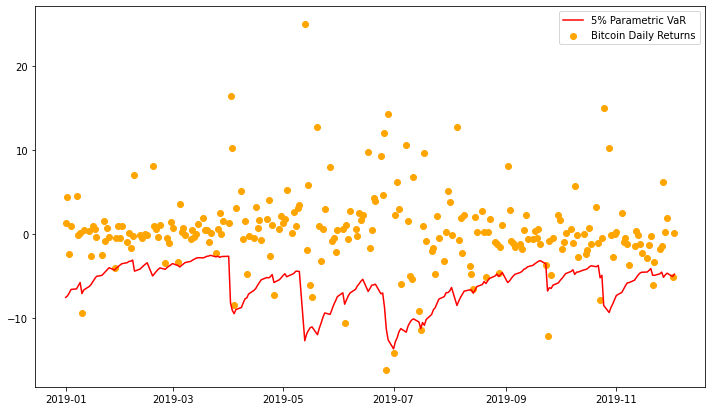

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
plt.figure(figsize=(12,7))

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')

# Specify model assumptions
basic_gm = arch_model(bitcoin_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
gm_result = basic_gm.fit(disp='off')
nu = gm_result.params['nu']
gm_forecast = gm_result.forecast(start='2019-01-01', reindex=True)
mean_forecast = gm_forecast.mean['2019-01-01':]
variance_forecast = gm_forecast.variance['2019-01-01':]

################################################################################

# Obtain the parametric quantile
q_parametric = basic_gm.distribution.ppf(0.05, nu)
print('5% parametric quantile: ', q_parametric)
    
# Calculate the VaR
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric

# Save VaR in a DataFrame
VaR_parametric = pd.DataFrame(VaR_parametric, columns = ['5%'], index=variance_forecast.index)

# Plot the VaR
plt.plot(VaR_parametric, color='red', label='5% Parametric VaR')
plt.scatter(variance_forecast.index, bitcoin_data.Return['2019-1-1':], color='orange', label='Bitcoin Daily Returns' )
plt.legend(loc='upper right')
plt.show()

Pay attention to the dots that fell below the ***VaR*** threshold. For 5% VaR there are less than 13 exceedances observed over 1 year, so the model is doing a decent job.

### ***Compute empirical VaR***

Estimate dynamic 5% daily VaRs with an empirical approach.

The difference between parametric VaR and empirical VaR is how the quantiles are estimated. The parametric approach estimates quantiles from an assumed distribution assumption, while the empirical approach estimates quantiles from an observed distribution of the standardized residuals.

You will use the same GARCH model as the previous exercise. The mean and variance forecasts are saved in `mean_forecast` and `variance_forecast` respectively. The empirical standardized residuals have also been calculated and saved in `std_resid`.

* Compute `0.05` quantile from the GARCH standardized residuals `std_resid`.
* Calculate VaR using `mean_forecast`, `variance_forecast` from the GARCH model and the quantile from the previous step.

5% empirical quantile:  -1.4979537203743556


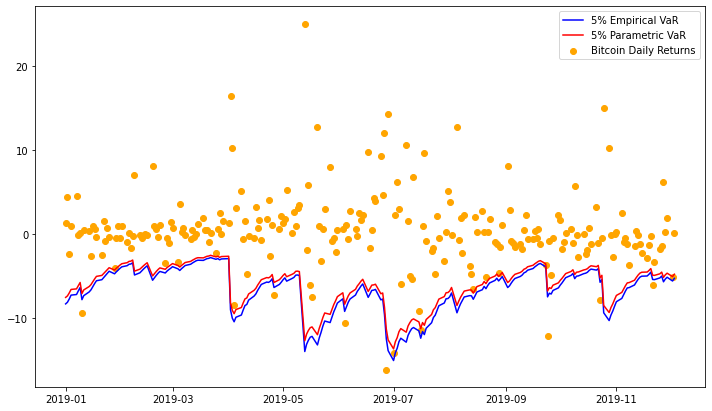

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
plt.figure(figsize=(12,7))

bitcoin_data = pd.read_csv('bitcoin.csv', parse_dates=True, index_col='Date')

# Specify model assumptions
basic_gm = arch_model(bitcoin_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
gm_result = basic_gm.fit(disp='off')
gm_forecast = gm_result.forecast(start='2019-01-01', reindex=True)
mean_forecast = gm_forecast.mean['2019-01-01':]
variance_forecast = gm_forecast.variance['2019-01-01':]
std_resid = gm_result.resid / gm_result.conditional_volatility

############################################################################

# Obtain the empirical quantile
q_empirical = std_resid.quantile(0.05)
print('5% empirical quantile: ', q_empirical)

# Calculate the VaR
VaR_empirical = mean_forecast.values + np.sqrt(variance_forecast).values * q_empirical

# Save VaR in a DataFrame
VaR_empirical = pd.DataFrame(VaR_empirical, columns=['5%'], index=variance_forecast.index)

# Plot the VaRs
plt.plot(VaR_empirical, color='blue', label='5% Empirical VaR')
plt.plot(VaR_parametric, color='red', label='5% Parametric VaR')
plt.scatter(variance_forecast.index,bitcoin_data.Return['2019-1-1':], color='orange', label='Bitcoin Daily Returns' )
plt.legend(loc='upper right')
plt.show()

Overall both VaRs are very close, but the empirical VaRs have bigger loss estimations, which implies VaRs based on the theoretical Student’s t-distribution assumption may underestimate the downside risks.

# ***Dynamic covariance with GARCH***

If two asset returns have correlation ρ and time-varying volatility of $σ_1$ and $σ_2$:

$$Covariance = \rho\sigma_1\sigma_2$$


In [ ]:
covariance = correlation * garch_vol1 * garch_vol2

## ***Step 1: Fit GARCH models and obtain volatility for each return series***

In [ ]:
# gm_eur, gm_cad are fitted GARCH models

vol_eur = gm_eur.conditional_volatility
vol_cad = gm_cad.conditional_volatility

## ***Step 2: Compute standardized residuals from the fitted GARCH***


In [ ]:
resid_eur = gm_eur.resid/vol_eur
resid_cad = gm_cad.resid/vol_cad

## ***Step 3: Compute ρ as simple correlation of standardized residuals***

In [ ]:
corr = np.corrcoef(resid_eur, resid_cad)[0,1]

## ***Step 4: Compute GARCH covariance by multiplying the correlation and volatility.***

In [ ]:
covariance = corr * vol_eur * vol_cad

### ***Compute GARCH covariance***

Covariance describes the relationship of movement between two price return series. Recall dynamic covariance can be computed by $ρ \times σ_1 \times σ_2$, where $σ_1, σ_2$ are volatility estimates from GARCH models, and $ρ$ is the simple correlation between GARCH standardized residuals.

Compute dynamic covariance with GARCH models. Specifically you will use two foreign exchange time series data: EUR/USD and USD/CAD (shown in the plot). Their price returns have been fitted by two GARCH models, and the volatility estimates are saved in `vol_eur` and `vol_cad`. In addition, their standardized residuals are saved in `resid_eur` and `resid_cad` respectively. In addition, the numpy package has been imported as `np`.

* Calculate correlation between GARCH standardized residuals `resid_eur` and `resid_cad`.
* Calculate covariance with GARCH volatility `vol_eur`, `vol_cad` and the correlation computed in the previous step.
* Plot the calculated covariance.

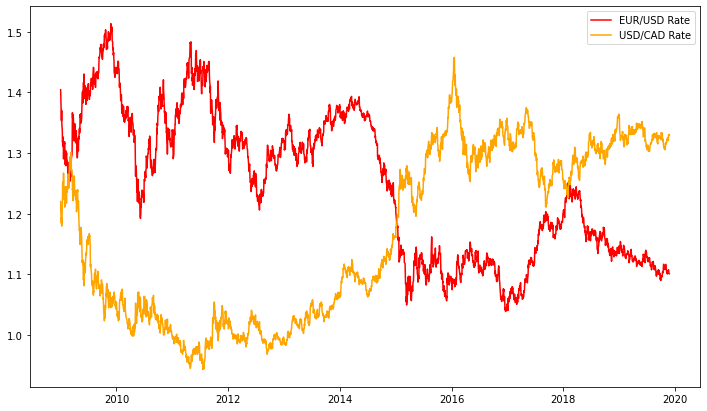

Correlation:  -0.4386422272745847


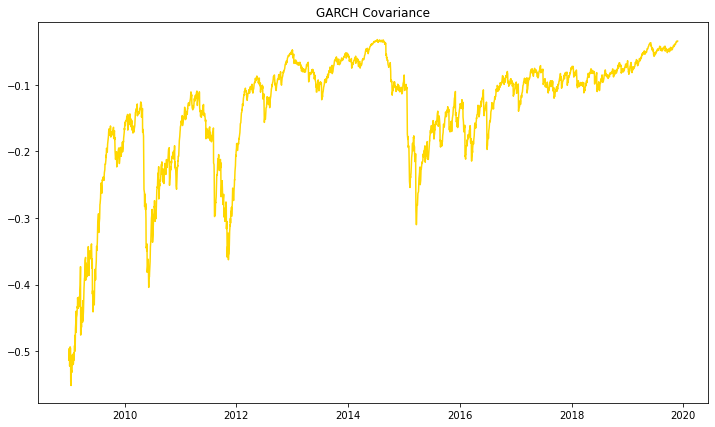

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

eur_data = pd.read_csv('eur.csv', index_col='Date', parse_dates=True)
cad_data = pd.read_csv('cad.csv', index_col='Date', parse_dates=True)

eur_gm = arch_model(eur_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
gmfit_eur = eur_gm.fit(disp='off')
vol_eur = gmfit_eur.conditional_volatility
resid_eur = gmfit_eur.resid/vol_eur

cad_gm = arch_model(cad_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
gmfit_cad = cad_gm.fit(disp='off')
vol_cad = gmfit_cad.conditional_volatility
resid_cad = gmfit_cad.resid/vol_cad

plt.figure(figsize=(12, 7))
plt.plot(eur_data['Close'], color='red', label='EUR/USD Rate')
plt.plot(cad_data['Close'], color='orange', label='USD/CAD Rate')
plt.legend()
plt.show()
##############################################################################

# Calculate correlation
corr = np.corrcoef(resid_eur, resid_cad)[0,1]
print('Correlation: ', corr)

# Calculate GARCH covariance
covariance =  corr * vol_eur * vol_cad

# Plot the data
plt.figure(figsize=(12, 7))
plt.plot(covariance, color = 'gold')
plt.title('GARCH Covariance')
plt.show()

Notice the EUR/USD and USD/CAD rates tend to move in the opposite directions, so their dynamic covariance is negative and fluctuating over time.

### ***Compute dynamic portfolio variance***

Compute the variance of a simple two-asset portfolio with GARCH dynamic covariance.

The Modern Portfolio Theory states that there is an optimal way to construct a portfolio to take advantage of the diversification effect, so one can obtain a desired level of expected return with the ***minimum risk***. This effect is especially evident when the covariance between asset returns is negative.

Suppose you have a portfolio with only two assets: EUR/USD and CAD/USD currency pairs. Their variance from the GARCH models have been saved in `variance_eur` and `variance_cad`, and their covariance has been calculated and saved in `covariance`. Compute the overall portfolio variances by varying the weights of the two assets, and visualize their differences.


* Set the EUR/USD weight `Wa1` in portfolio a to `0.9`, and `Wb1` in portfolio b to `0.5`.
* Calculate the variance `portvar_a` for portfolio a with `variance_eur`, `variance_cad` and `covariance`; do the same to compute `portvar_b` for portfolio b.

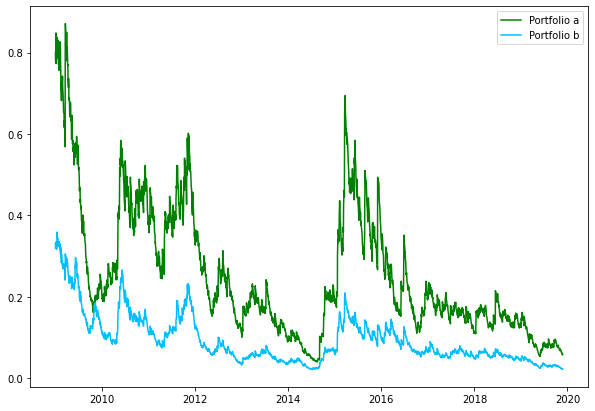

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

eur_data = pd.read_csv('eur.csv', index_col='Date', parse_dates=True)
cad_data = pd.read_csv('cad.csv', index_col='Date', parse_dates=True)

eur_gm = arch_model(eur_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
gmfit_eur = eur_gm.fit(disp='off')
vol_eur = gmfit_eur.conditional_volatility
variance_eur = vol_eur**2
resid_eur = gmfit_eur.resid/vol_eur

cad_gm = arch_model(cad_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
gmfit_cad = cad_gm.fit(disp='off')
vol_cad = gmfit_cad.conditional_volatility
variance_cad = vol_cad**2
resid_cad = gmfit_cad.resid/vol_cad

# Calculate correlation
corr = np.corrcoef(resid_eur, resid_cad)[0,1]

# Calculate GARCH covariance
covariance =  corr * vol_eur * vol_cad

##############################################################################

# Define weights
Wa1 = 0.9
Wa2 = 1 - Wa1
Wb1 = 0.5
Wb2 = 1 - Wb1

# Calculate portfolio variance
portvar_a = Wa1**2 * variance_eur + Wa2**2 * variance_cad + 2*Wa1*Wa2 * covariance
portvar_b = Wb1**2 * variance_eur + Wb2**2 * variance_cad + 2*Wb1*Wb2 * covariance

# Plot the data
plt.figure(figsize=(10, 7))
plt.plot(portvar_a, color = 'green', label = 'Portfolio a')
plt.plot(portvar_b, color = 'deepskyblue', label = 'Portfolio b')
plt.legend(loc = 'upper right')
plt.show()

Portfolio b is much less volatile compared to portfolio a. Even just for a simple two-asset portfolio, how you structure it can greatly alter the risk profile.

# ***Beta in CAPM***

* Beta measures the risk of an investment that cannot be reduced by diversification.
* Estimate risk premium of a stock

$$E(R_s) = R_f +\beta(E(R_m)-R_f)$$

* $R_s$: stock required rate of return
* $R_f$: risk-free rate (e.g. Treasuries)
* $R_m$: market return (e.g. S&P 500)
  * $E(R_m) − R_f$ : Market premium

# ***Dynamic Beta with GARCH***

$$\beta = \rho \times \frac{\sigma_{\text{stock}}}{\sigma_{\text{market}}}$$

# ***Calculate dynamic Beta in Python***

## ***Step 1: Compute correlation between S&P500 and stock***

In [ ]:
resid_stock = stock_gm.resid / stock_gm.conditional_volatility
resid_sp500 = sp500_gm.resid / sp500_gm.conditional_volatility
correlation = numpy.corrcoef(resid_stock, resid_sp500)[0, 1]

## ***Step 2: Compute dynamic Beta for the stock***



In [ ]:
stock_beta = correlation * (stock_gm.conditional_volatility /sp500_gm.conditional_volatility)

### ***Compute dynamic stock Beta***

Suppose Elon Musk is your idol and you are considering investing in some Tesla stocks. As a shrewd portfolio manager, you decide to do due diligence by checking Tesla stock Beta over the years. Beta is a measure of a stock's volatility in relation to the market, which can serve as a gauge of investment risks.

Recall you need 
* stock volatility
* market (S&P 500 as a proxy) volatility
* their return correlation 

to compute Beta. Correlation can be computed from standardized residuals.

Model fitted volatility has been preloaded for Tesla in `teslaGarch_vol`, and for S&P 500 in `spGarch_vol`. In addition, model standardized residuals are preloaded in `teslaGarch_resid` and `spGarch_resid` respectively.

* Compute the correlation coefficient between Tesla and S&P 500 using standardized residuals from fitted GARCH models (`teslaGarch_resid`, `spGarch_resid`).

* Compute Tesla stock Beta using Tesla volatility (`teslaGarch_vol`), S&P 500 volatility (`spGarch_vol`) and correlation computed from the previous step.

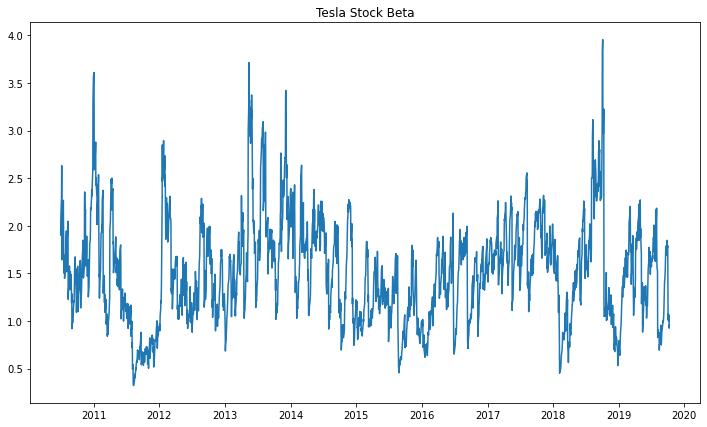

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
plt.figure(figsize=(12, 7))

sp_data = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)
tesla_data = pd.read_csv('Tesla.csv', index_col='Date', parse_dates=True)

sp_gm = arch_model(sp_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
sp_result = sp_gm.fit(disp='off')
spGarch_vol = sp_result.conditional_volatility
spGarch_resid  = sp_result.resid/spGarch_vol

tesla_gm = arch_model(tesla_data['Return'], mean ='constant', p=1, q=1, vol='GARCH', dist='t')
tesla_result  = tesla_gm.fit(disp='off')
teslaGarch_vol = tesla_result.conditional_volatility
teslaGarch_resid = tesla_result.resid/teslaGarch_vol

##############################################################################
# Compute correlation between SP500 and Tesla
correlation = np.corrcoef(teslaGarch_resid, spGarch_resid)[0, 1]

# Compute the Beta for Tesla
stock_beta = correlation * (teslaGarch_vol / spGarch_vol)

# Plot the Beta
plt.title('Tesla Stock Beta')
plt.plot(stock_beta)
plt.show()